In [45]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from matplotlib import pyplot as plt

import numpy as np
import cv2
import os

%matplotlib inline 

K.set_image_dim_ordering('th') #usa a ordem de parâmetros de imagem do Theano (canais da imagem(1), pixeis(28), pixeis(28))

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#entrada/label       entrada/label
#informações treino  informações teste


x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32') #altera a estrutura do conjunto de treinos para que corresponda as do mnist
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')# (quantidade imagens(train = 60000, test = 10000, quantidade canais imagem, pixeis, pixeis)

x_train = x_train / 255 #para que intervalos de valores dos pixeis estejam entre 0 e 1, e não entre 0  e 255
x_test = x_test / 255

y_train = np_utils.to_categorical(y_train) #transforma o label na forma em que a net consegue entender na layer de output
y_test = np_utils.to_categorical(y_test)

qtd_classes = y_test.shape[1] #quantidade de classes na saída da FCL

#abaixo começa o modelo de convnet de nome: batata

batata = Sequential() #inicia o modelo

batata.add(Conv2D(30, (5, 5), input_shape = (1, 28, 28), activation = 'relu'))
#   (featured maps, tamanho filtro(x, y), formato dados de entrada, função de ativação)

batata.add(MaxPooling2D(pool_size = (2, 2))) #tamanho da pool

batata.add(Conv2D(15, (3, 3), input_shape = (1, 28, 28), activation = 'relu'))

batata.add(MaxPooling2D(pool_size = (2, 2)))

batata.add(Dropout(0.2)) #probabilidade de desligamento de neurônios por iteração (20%)

batata.add(Flatten()) #transforma matriz em vetor, para a FCL poder receber como input

batata.add(Dense(2048, activation = 'relu')) #FCL (Fully conected layers) onde ocorre de fato a classificação

batata.add(Dense(2048, activation = 'relu'))

batata.add(Dense(2048, activation = 'relu'))

batata.add(Dense(1024, activation = 'relu'))

batata.add(Dense(512, activation = 'relu'))

batata.add(Dense(256, activation = 'relu'))

batata.add(Dense(128, activation = 'relu'))

batata.add(Dense(64, activation = 'relu'))

batata.add(Dense(32, activation = 'relu'))

batata.add(Dense(qtd_classes, activation = 'softmax', name = 'result')) #ultima camada da FCL, a de saída

batata.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #define função pra calcular a loss, função optimizer(redistribui os pesos), e o objetivo, nesse caso é precisão

batata.summary()










_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 375)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 2048)              770048    
__________

In [47]:
batata.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 200)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 296s 5ms/step - loss: 0.0560 - acc: 0.9860 - val_loss: 0.0387 - val_acc: 0.9911
Epoch 2/10
60000/60000 [==============================] - 292s 5ms/step - loss: 0.0480 - acc: 0.9884 - val_loss: 0.0347 - val_acc: 0.9911
Epoch 3/10
60000/60000 [==============================] - 313s 5ms/step - loss: 0.0473 - acc: 0.9881 - val_loss: 0.0490 - val_acc: 0.9888
Epoch 4/10
60000/60000 [==============================] - 293s 5ms/step - loss: 0.0433 - acc: 0.9901 - val_loss: 0.0428 - val_acc: 0.9901
Epoch 5/10
60000/60000 [==============================] - 294s 5ms/step - loss: 0.0414 - acc: 0.9901 - val_loss: 0.0358 - val_acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 292s 5ms/step - loss: 0.0372 - acc: 0.9913 - val_loss: 0.0332 - val_acc: 0.9922
Epoch 7/10
60000/60000 [==============================] - 291s 5ms/step - loss: 0.0363 - acc: 0.9917 - val_loss: 0.0440 - 

In [41]:
results = batata.evaluate(x_test, y_test, verbose = 0)
print("\nacc: %.2f%%" %(results[1]*100))


acc: 99.28%


A probabilidade de ser um  5 é de: 100.00%


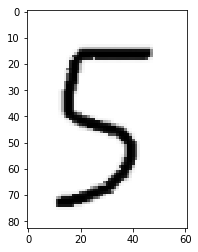

In [53]:
#Importa imagem, redimensiona e a testa na rede
img = cv2.imread("INSIRA_AQUI.png", 0)

plt.imshow(img, cmap = 'gray')

if img.shape != [28, 28]:
    img2 = cv2.resize(img, (28, 28))
    img = img2.reshape(28, 28, -1)
else:
    img = img.reshape(28, 28, -1)

img = img.reshape(1, 1, 28, 28)

result = batata.predict_classes(img)
result_prob = batata.predict_proba(img)
result_prob = "%.2f%%" %(result_prob[0][result]*100)

print("A probabilidade de ser um ", result[0], "é de:", result_prob)